# Exploratory Data Analysis on Stock Prices

This is my first project on Exploratory Data Analysis on Financial dataset (stock prices). This project is meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice. 

#### Dataset: 
I will be using the stock information directly from the internet using Pandas datareader. 
Incase, you don't have it, install using "pip install pandas-datareader" 

In [1]:
# Basic Imports

import numpy as np
import pandas as pd
import datetime
from pandas_datareader import data, wb
import matplotlib.pyplot as plt

### Loading the Dataset

Here, I will make use of pandas datareader to get the stock information of the following banks from Jan 1st 2010 to Jan 1st 2020.

-CitiGroup [C]  
-Goldman Sachs [GS]  
-JPMorgan Chase [JPM]  
-Morgan Stanley [MS]  
-Wells Fargo [WFC]  

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
bank_abbrev = ['C', 'GS', 'JPM', 'MS', 'WFC'] # abbrevations for each banks

In [5]:
bank_stocks = pd.concat([C, GS, JPM, MS, WFC], axis = 1, keys = bank_abbrev)

In [6]:
bank_stocks.columns.names = ['Bank Abbrev','Stock Info']

In [7]:
bank_stocks.head()

Bank Abbrev          C                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2010-01-04   34.099998  33.400002  33.599998  34.000000  40679300.0   
2010-01-05   35.500000  34.099998  34.200001  35.299999  66861700.0   
2010-01-06   36.799999  35.099998  35.599998  36.400002  67433800.0   
2010-01-07   37.000000  36.099998  36.900002  36.500000  67245100.0   
2010-01-08   36.700001  35.099998  36.500000  35.900002  62409700.0   

Bank Abbrev                     GS                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2010-01-04   30.843197  174.250000  169.509995  170.050003  173.080002  ...   
2010-01-05   32.022488  176.259995  172.570007  173.000000  176.139999  ...   
2010-01-06   33.020370  175.380005  173.759995  175.380005  174.259995  ...   
2010-01-07   33.111080  178.750000  173.949997  174.320007  177.669998  ...   
2010-01-08   32.566792  177.429993  173.949997  176.330002  174.309998  ...   

Bank Abbrev         MS                                      WFC             \
Stock Info        Open      Close      Volume  Adj Close   High        Low   
Date                                                                         
2010-01-04   30.700001  30.910000  20371000.0  25.938982  27.48  26.820000   
2010-01-05   31.010000  32.040001  22523400.0  26.887259  28.24  27.240000   
2010-01-06   31.969999  32.450001  17028500.0  27.231318  28.33  27.790001   
2010-01-07   32.459999  32.919998  18693000.0  27.625725  29.43  27.920000   
2010-01-08   32.599998  32.250000  15993400.0  27.063484  29.35  28.600000   

Bank Abbrev                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2010-01-04   27.020000  27.320000  39335700.0  20.402374  
2010-01-05   27.270000  28.070000  55416000.0  20.962465  
2010-01-06   28.030001  28.110001  33237000.0  20.992338  
2010-01-07   28.120001  29.129999  61649000.0  21.754063  
2010-01-08   28.900000  28.860001  35508700.0  21.552431  

[5 rows x 30 columns]

### Exploratory Data Analysis

A bunch of questions to try on!
1. What is the max Close price for each bank's stock throughout the time period?
2. What is the returns for each bank's stock?
3. Figure out on what dates each bank stock had the best and worst single day returns?
4. which stock would you classify as the riskiest over the entire time period?
5. Create a line plot showing Close price for each bank for the entire index of time
6. Analyze the moving averages for these stocks for a particular year.
7. Create a heatmap of the correlation between the stocks Close Price

#### 1. What is the max Close price for each bank's stock throughout the time period?

In [8]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Abbrev
C       80.080002
GS     273.380005
JPM    139.399994
MS      58.910000
WFC     65.930000
dtype: float64

#### 2. What is the returns for each bank's stock?

In [9]:
# We can use pct_change on 'Close' column to get the returns for each bank's stock. 

returns = pd.DataFrame()

Formula for return calculation:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
for bank in bank_abbrev:
    returns[bank+ ' Returns'] = bank_stocks[bank]['Close'].pct_change()

returns.head()

,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.031162,-0.010673,0.005494,0.012796,0.001425
2010-01-07,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


In [11]:
# Lets visualize the returns data using pairplot.

import seaborn as sns
sns.set_style('whitegrid')

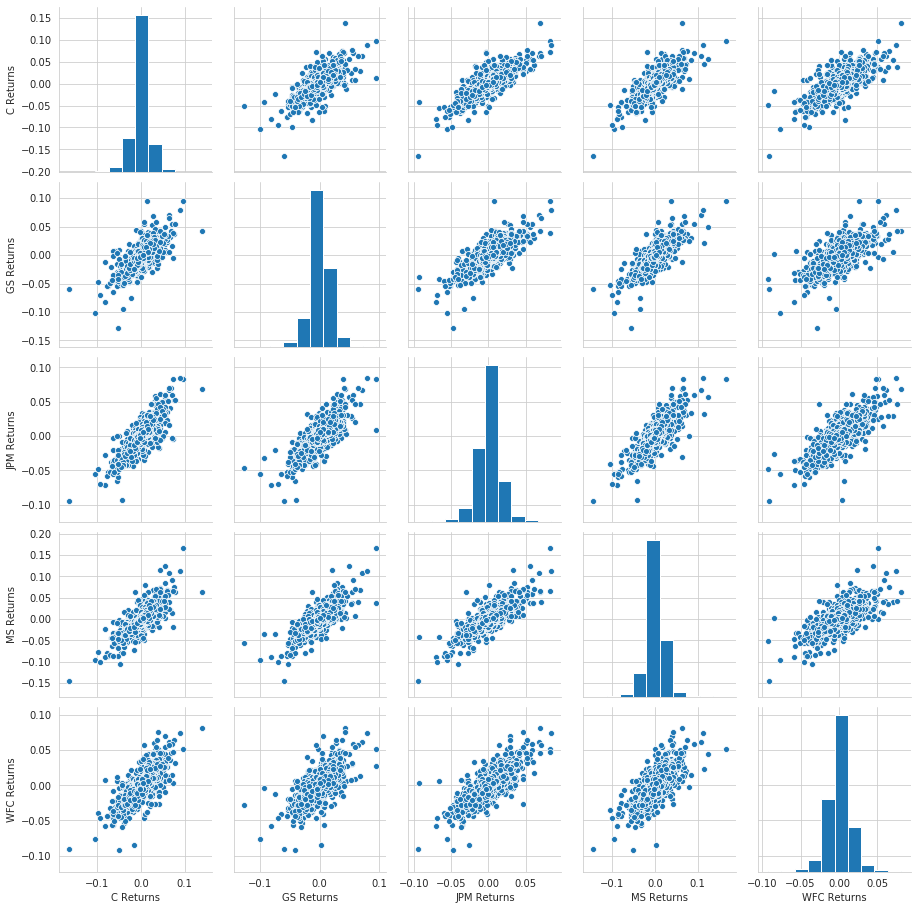

In [12]:
sns.pairplot(returns[1:])

#### 3. Figure out on what dates each bank stock had the best and worst single day returns?

In [13]:
# Worst single day returns

returns.idxmin()

C Returns     2011-08-08
GS Returns    2010-04-16
JPM Returns   2011-08-08
MS Returns    2011-08-08
WFC Returns   2018-02-05
dtype: datetime64[ns]

Notice that 3 banks[C, JPM and MS] share the same day for the worst drop.

In [14]:
# Best single day returns

returns.idxmax()

C Returns     2011-08-09
GS Returns    2019-01-16
JPM Returns   2011-11-30
MS Returns    2011-10-27
WFC Returns   2011-08-09
dtype: datetime64[ns]

#### 4. which stock would you classify as the riskiest over the entire time period?

In [15]:
# we can use standard deviation on the returns dataframe to get the riskiest timeperiod.

returns.std()

C Returns      0.019520
GS Returns     0.016418
JPM Returns    0.015781
MS Returns     0.020769
WFC Returns    0.015169
dtype: float64

According to these numbers, Morgan Stanley[MS] and Citigroup[C] has similar risk profiles.

In [16]:
# let's check the risk profiles for the year 2019.

returns.loc['2019-01-01':'2019-12-31'].std()

C Returns      0.015354
GS Returns     0.014890
JPM Returns    0.011869
MS Returns     0.014701
WFC Returns    0.012450
dtype: float64

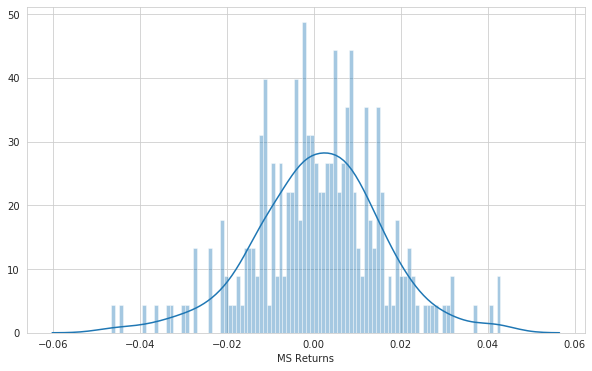

In [17]:
# Create distance plots for MS and C for the year 2019.

plt.figure(figsize = (10,6))
sns.distplot(returns.loc['2019-01-01':'2019-12-31']['MS Returns'], bins = 100)

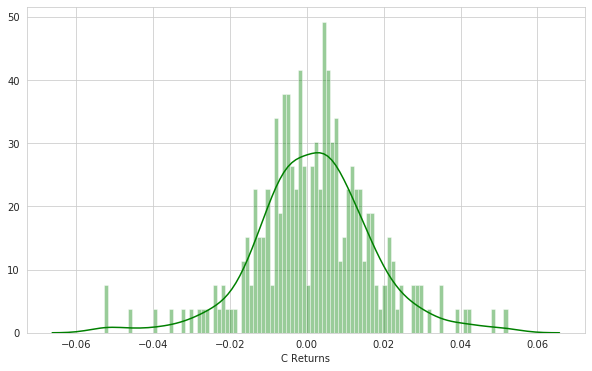

In [18]:
plt.figure(figsize = (10,6))
sns.distplot(returns.loc['2019-01-01':'2019-12-31']['C Returns'], color = 'green', bins = 100)

#### 5. Create a line plot showing Close price for each bank for the entire index of time

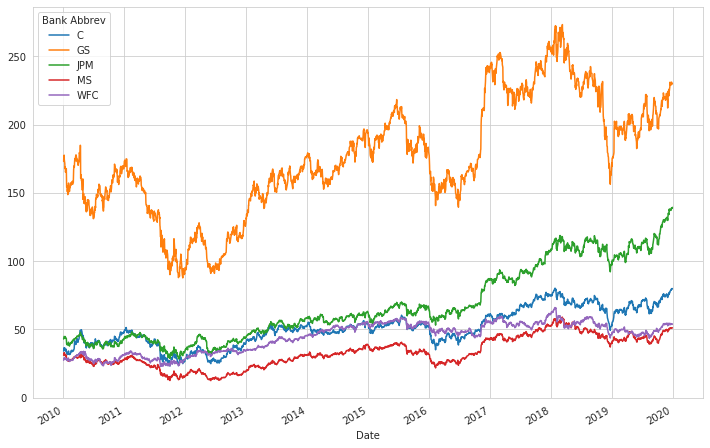

In [19]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).plot(figsize = (12,8))

#### 6. Handling the case of Moving Average

lets consider the 30 day moving average for a particular bank, say Goldman sachs for the year 2018.

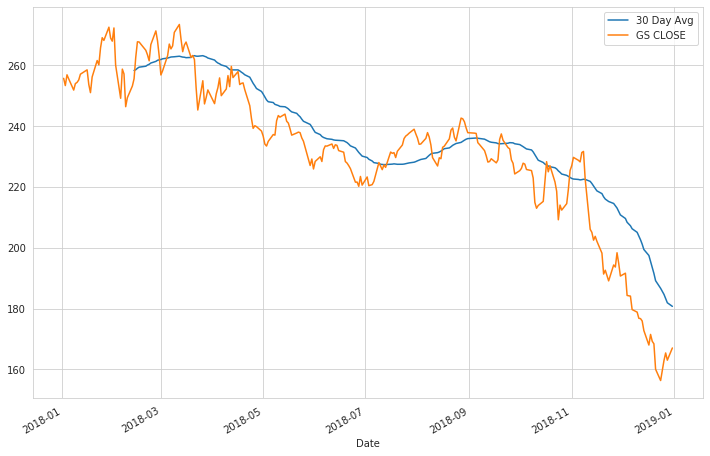

In [20]:
plt.figure(figsize=(12,8))
GS['Close'].loc['2018-01-01':'2019-01-01'].rolling(window = 30).mean().plot(label = '30 Day Avg')
GS['Close'].loc['2018-01-01':'2019-01-01'].plot(label = 'GS CLOSE')
plt.legend()

#### 7. Create a heatmap of the correlation between the stocks Close Price

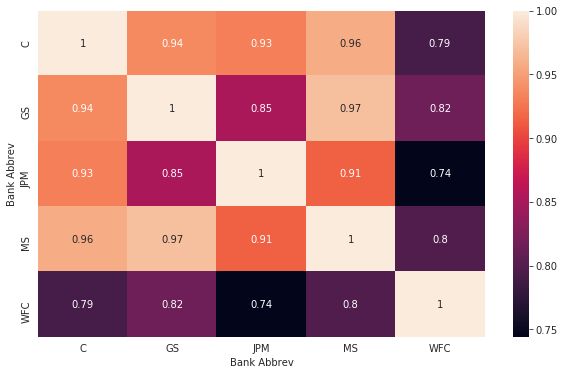

In [21]:
plt.figure(figsize = (10,6))
sns.heatmap(bank_stocks.xs(key = 'Close',axis = 1,level = 'Stock Info').corr(),annot = True)

##### That's all for now.